# LAB3: PCA + conjunto de dados MNIST

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Fábio Dias
## Número: 42921

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Conjunto de dados $\texttt{MNISTsmall.p}$:

# Pergunta 1: Considere os dígitos "3", "8" e "9"  dos dados (3000 dígitos de treino e 1500 de teste).
## a) Calcule a matriz de PCA para os 3000 dígitos de treino. Use um número de componentes principais de modo aos dados projetados terem $95\%$ da variância total dos dados originais. Especifique (imprima) qual o número de componentes obtidas. 
## b) Visualize em forma de imagem, as três primeiras componetes principais (3 imagens de $28\times28$).
## c) Aplique a transformação PCA ao primeiro dígito "3" e ao primeiro dígito "8" do conjunto de teste. Visualize em forma de imagem os dígitos originais e os dígitos reconstruídos após a transformação PCA inversa.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle
from sklearn.decomposition import PCA

### a)

In [4]:
D = pickle.load(open('MNISTsmall.p', 'rb'))
X = D['X'] * 1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']


#Dados de Treino
X1 = X[:, f1]
y1 = y[f1]

#Dados de Teste
X2 = X[:, f2]
y2=  y[f2]

#Dados Treino Organizados
idx = (y1 == 3) | (y1 == 8) | (y1 == 9) 
X1 = X1[:, idx]
y1 = y1[idx]

#Dados Teste Organizados
idx = (y2 == 3) | (y2 == 8) | (y2 == 9)
X2 = X2[:, idx]
y2 = y2[idx]

#Covariancia
C3 = np.cov(X1[:, y1 == 3])
C8 = np.cov(X1[:, y1 == 8])
C9 = np.cov(X1[:, y1 == 9])

C = C3 + C8 + C9

u, W = la.eig(C)
u = u.real
W = W.real

idx = np.argsort(-u)
u = u[idx]
W = W[:, idx]

#Obter número de componente principais com 95% variância.
un = u / np.sum(u)
L = np.cumsum(un)

print("Número de componentes principais de modo a obter 95% de Variância: ", np.sum(L <= 0.95))

#Falta-me conseguir a matriz.
#Projecção nas Componentes Principais
#W2 = W[:, 150]
# m = np.mean(X1, axis=1)[:, np.newaxis]
# Xn = X1-m
# Xp = np.dot(W2.T, Xn)

pca = PCA(n_components=150).fit(X1.T)
X1p = pca.transform(X1.T)

Número de componentes principais de modo a obter 95% de Variância:  150


### b)

In [17]:
m = np.mean(X1, axis=1)[:, np.newaxis]
Xn = X1 - m
W2 = W[:, :150]
Xp = np.dot(W2.T, Xn)
Xr = np.dot(W2, Xp) + m

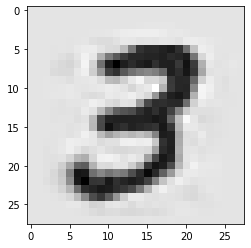

In [18]:
x = Xr[:, 0].reshape(28, 28)
plt.imshow(x, cmap='binary')

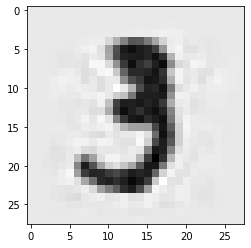

In [19]:
x = Xr[:, 1].reshape(28, 28)
plt.imshow(x, cmap='binary')

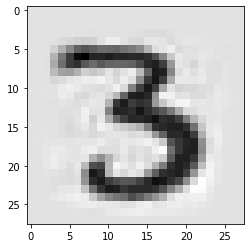

In [20]:
x = Xr[:, 2].reshape(28, 28)
plt.imshow(x, cmap='binary')

### c)

Text(0.5, 1.0, '8 PCA Inverso')

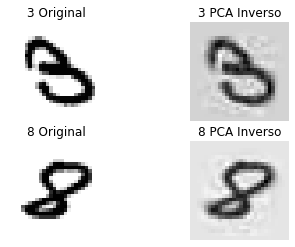

In [21]:
pca = PCA(n_components=150).fit(X1.T)
X2a = pca.transform(X2.T).T

#------- Embora acredite que o que fiz abaixo está certo, os resultados com o pca.inverse_transform estão melhores.
#------- Assim sendo, vou deixar os resultados do pca.inverse_transform
#Transformação PCA inversa
# X2r = np.dot(W2, X2a)
# X2r = X2r + m

# #Normalizar Amplitude dos Digitos Reconstruídos. (0 - 255)
# X2r=X2r-X2r.min()
# X2r=255.0*X2r/X2r.max()

#Alternativa, tenho este método
X2ai = pca.inverse_transform(X2a.T).T

plt.subplot(2, 2, 1)
plt.imshow(X2[:, 0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("3 Original")

plt.subplot(2, 2, 2)
plt.imshow(X2ai[:, 0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("3 PCA Inverso")

plt.subplot(2, 2, 3)
plt.imshow(X2[:, 500].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("8 Original")

plt.subplot(2, 2, 4)
plt.imshow(X2ai[:, 500].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.title("8 PCA Inverso")

# Pergunta 2: Considere todos os dados
## a) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados e aplique a transformação aos dados de treino e teste. 
## b) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados de treino transformados, e calcule a matriz de confusão e o número total de erros nos dados de teste transformados.
## c) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $75\%$ da variância total dos dados e os dados transformardos terem média nula e variância unitária em cada dimensão. Aplique a transformação aos dados de treino e teste. 
## d) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados transformados da alínea anterior, e calcule a matriz de confusão e o número total de erros nos dados de teste.

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

### a)

In [23]:
X = D['X'] * 1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

#Dados de Treino
X1 = X[:, f1]
y1 = y[f1]

#Dados de Teste
X2 = X[:, f2]
y2 =  y[f2]

#Covariância
Cx =np.cov(X1)
 
u, W = la.eig(Cx)
u = u.real
W = W.real

idx = np.argsort(-u)
u = u[idx]
W = W[:, idx]

un = u / np.sum(u)
L = np.cumsum(un)

print("Número de componentes principais de modo a obter 75% de Variância: ", np.sum(L <= 0.75))

pca = PCA(n_components=32).fit(X1.T)
X1a = pca.transform(X1.T).T
X2a = pca.transform(X2.T).T

Número de componentes principais de modo a obter 75% de Variância:  32


### b)

In [24]:
svm.fit(X1a.T, y1)
y2e = svm.predict(X2a.T)

CM = confusion_matrix(y2, y2e)

print(CM)
print("Numero de Erros: ", np.sum(y2 != y2e))

[[493   0   2   0   0   2   2   0   1   0]
 [  0 492   3   2   0   1   1   1   0   0]
 [  3   0 475   4   1   1   5   8   3   0]
 [  0   0   2 475   0  10   1   8   3   1]
 [  1   0   1   0 478   0   5   0   0  15]
 [  1   0   0   6   3 481   4   1   3   1]
 [  7   3   0   0   3   1 483   0   3   0]
 [  0   8  16   4   6   0   0 458   0   8]
 [  5   0   1  10   3   3   0   4 471   3]
 [  4   6   0   5  13   3   0   4   6 459]]
Numero de Erros:  235


### c)

In [25]:
#Obter as Dimensões com 75% de Variância
W = W[:, :32]

#Anular a média
m = np.mean(X1, axis = 1)[:, np.newaxis]
X1n = X1 - m
X1p = np.dot(W.T, X1n)

X2n = X2 - m
X2p = np.dot(W.T, X2n)

#Normalizar a Variância
s = np.std(X1p, axis=1)
S = np.diag(1/s)
X1p = np.dot(S, X1p)

s = np.std(X2p, axis=1)
S = np.diag(1/s)
X2p = np.dot(S, X2p)

pca = PCA(n_components=32).fit(X1p.T)
X1a = pca.transform(X1p.T).T
X2a = pca.transform(X2p.T).T

### d)

In [26]:
svm.fit(X1a.T, y1)
y2e = svm.predict(X2a.T)

CM = confusion_matrix(y2, y2e)

print(CM)
print("Numero de Erros: ", np.sum(y2 != y2e))

[[494   0   1   0   0   1   3   0   1   0]
 [  0 492   4   2   0   1   0   1   0   0]
 [  1   0 474   5   2   0   4   8   5   1]
 [  0   0   3 475   0  11   1   7   2   1]
 [  0   0   1   0 479   0   4   0   1  15]
 [  0   0   0   8   1 485   3   1   1   1]
 [  7   3   0   0   3   3 482   0   2   0]
 [  1   9  16   1   4   0   0 459   2   8]
 [  4   0   5  10   1   3   0   3 472   2]
 [  4   6   1   6  12   3   0   6   4 458]]
Numero de Erros:  230
